In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

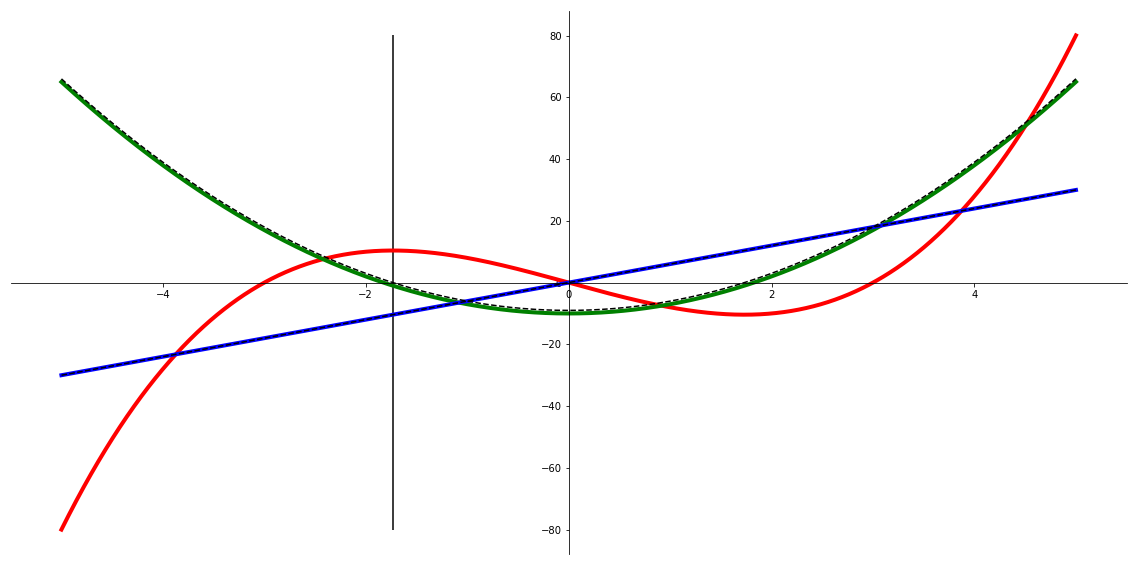

[-1.73212324] [ -7.24372568e-05]


In [61]:
#define testing function
def q(x):
    return(x**3 - 9*x)
#create test arrays with variable size
step=0.001
x=np.arange(-5,5+step,step)
y=q(x)

#define differentiation function
def grad(x,y):
    l=len(x)
    step=x[1]-x[0]
    dx=np.linspace(x.min()+step/2.,x.max()-step/2.,l-1)    #create array of points halfway between each original x value
    dy=[]
    for i in range(l-1):        
        dy.append((y[i]-y[i+1])/(x[i]-x[i+1]))    #calculate gradient between each pair of x,y values
    dy=np.array(dy)
    return(dx,dy)

#define peak finding function
def find(x,y,n=100000,filt=0.5):                        #specify default size of n for reasonable speed runs
    
    
    
    x_int = np.linspace(x.min(),x.max(),n)    #create x-array of size n
    interp = interp1d(x,y,kind='cubic')
    y_int = interp(x_int)
    dx,dy=grad(x_int,y_int)
    dx_int = np.linspace(dx.min(),dx.max(),n)    #create x-array of size n
    dinterp = interp1d(dx,dy,kind='cubic')
    dy_int = dinterp(dx_int)                     #create y-array smoothly interpolated
    r=np.where(np.diff(np.sign(dy_int))!=0)*1  #find indices of y_int where the value changes sign
    r=r[0]    
    d2x,d2y=grad(dx_int,dy_int)                   #differentiate arrays
    d2x_int = np.linspace(d2x.min(),d2x.max(),n)
    d2_interp = interp1d(d2x,d2y,kind='cubic')
    d2y_int = d2_interp(d2x_int)                 #repeat interpolation steps
    peaks=[]
    y_max_list=y_int[r]
    for i in r:
        if d2y_int[i]<0 and y_int[i] >= filt*y_max_list.max():                       #as y_int and dy_int are the same size, dy_int[i] is the gradient of y at y_int[i]
            peaks.append(dx_int[i])            #record x position of the peak
    peaks=np.array(peaks)
    return(peaks)
    

#calcuate gradients and peaks
dx,dy=grad(x,q(x))
d2x,d2y=grad(dx,dy)
peaks=find(x,y)

#plot example functions and manually differantiated gradients
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'r',lw=4)
ax.plot(x,3*x**2 -10 ,'g',lw=4)
ax.plot(x,6*x,'b',lw=4)

#plot funtion differentiated gradients
ax.plot(dx,dy,'k--')
ax.plot(d2x,d2y,'k--')

#mark peak
ax.vlines(peaks,y.min(),y.max())

#plot formatting
ax.spines['top'].set_visible(0)
ax.spines['right'].set_visible(0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.show()

#print peak x-value and the difference between found peak and known solution
print(peaks, peaks+np.sqrt(3))

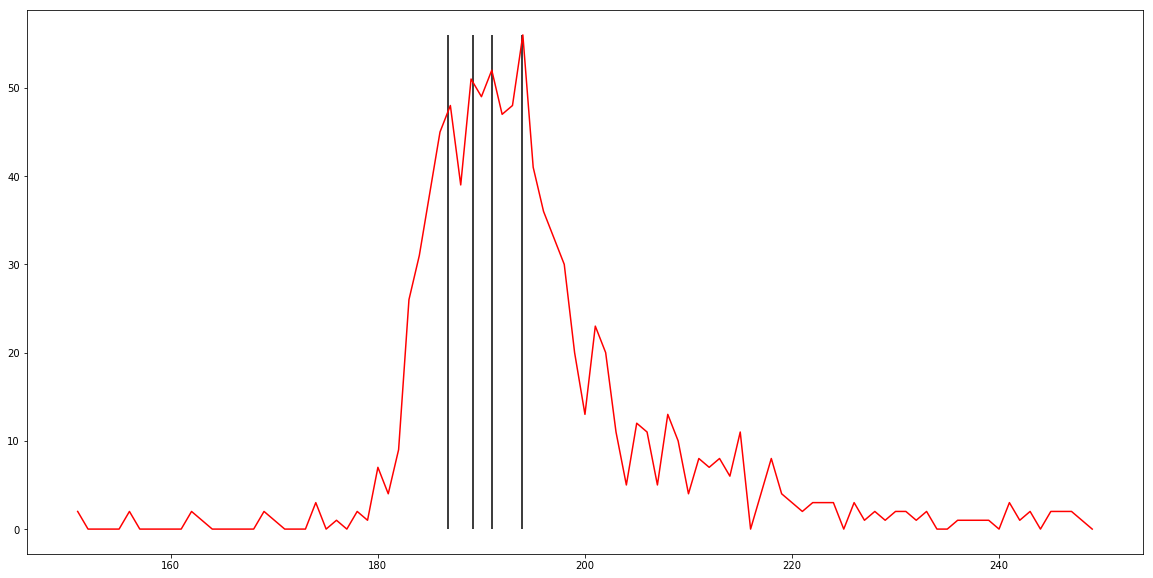

In [56]:
#define easy subset function
def sub(x,y,low,upp):
    return(x[(x>low)&(x<upp)],y[(x>low)&(x<upp)])

#load data and reduce to first peak
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
x,y=sub(x,y,150,250)

#calcuate gradients and peaks
peaks=find(x,y)

#plot
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'r')
#ax.plot(dx,dy,'k--')
#ax.plot(d2x,d2y,'k--')

ax.vlines(peaks,y.min(),y.max())

plt.show()

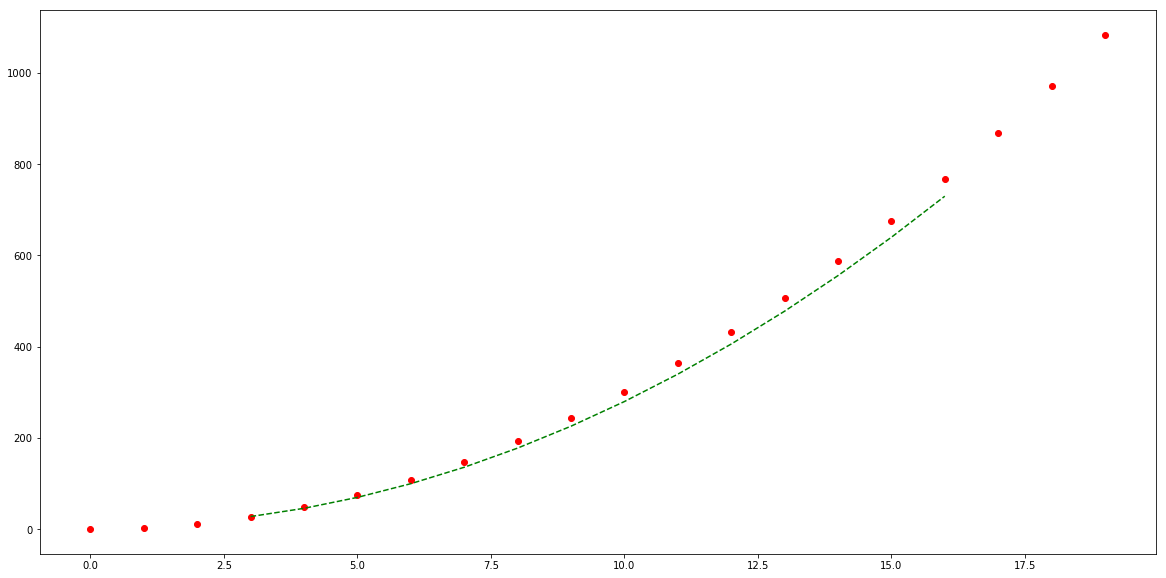

In [57]:
def box(x,y,w=3):
    l=len(x)
    x2=np.linspace(x[w],x[l-(w+1)],(l-2*w))
    #print(x,x2)
    y2=[]
    for i in range(len(x2)):
        #print(i,x2[i],y[i],y[i+2*w])
        y2.append(np.mean(y[i:i+2*w]))
    y2=np.array(y2)
    return(x2,y2)
    
    
    
x=np.arange(20)
y=3*x**2
x2,y2=box(x,y)


fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'ro')
ax.plot(x2,y2,'g--')
plt.show()




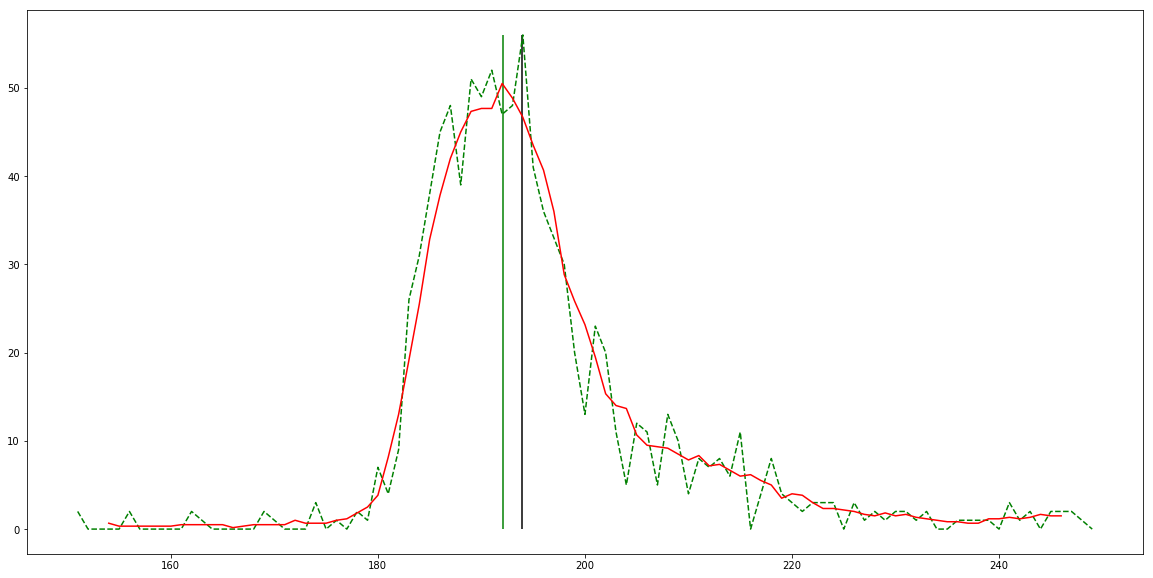

In [60]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
x,y=sub(x,y,150,250)
x2,y2=box(x,y,3)

peaks=find(x,y,filt=1)
p2=find(x2,y2,filt=1)
ax.vlines(peaks,y.min(),y.max())
ax.vlines(p2,y.min(),y.max(),colors='g')

ax.plot(x,y,'g--')
ax.plot(x2,y2,'r-')
plt.show()